## Explatory Data Anylysis(EDA)

In [1]:
import pandas as pd
import numpy as np 
import scipy
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('..\data\clean_merged.csv')


In [3]:
# Ensure DATE is a datetime object
df['DATE'] = pd.to_datetime(df['DATE'])


# Create the interactive line chart
fig = px.line(
    df, 
    x='DATE', 
    y='gold_close', 
    title='Historical Gold Spot Price (1985 - 2025)',
    labels={'DATE': 'Date', 'gold_close': 'Gold Price (USD)'},
    template='plotly_white'  # Gives it a clean, professional look
)

# Customize the line (Making it gold!)
fig.update_traces(line_color='#D4AF37', line_width=2)

# Add a range selector (Optional - adds buttons for 1y, 5y, etc.)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Display the plot
fig.show()

c:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


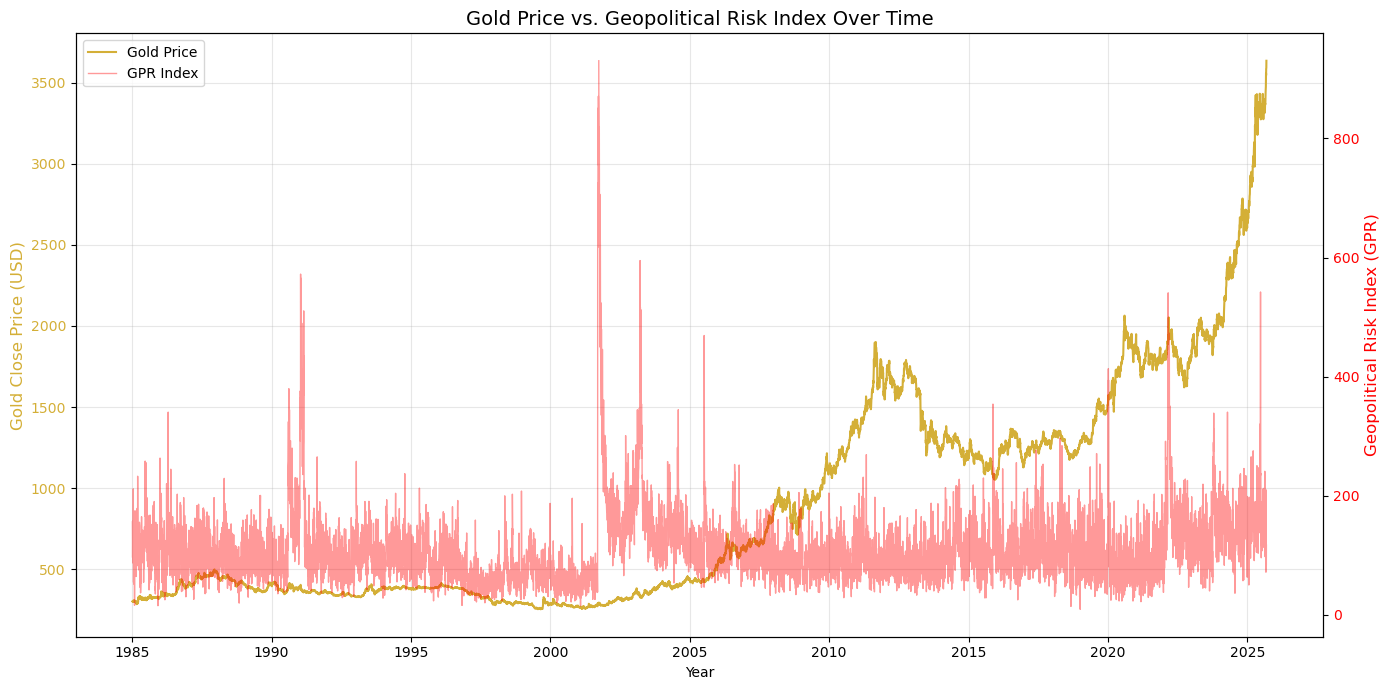

In [4]:
# Ensure gpr_index is numeric (handling any strings/errors)
df['gpr_index'] = pd.to_numeric(df['gpr_index'], errors='coerce')

# Sort by date to ensure the line plot connects correctly
df = df.sort_values('DATE')

# Create the Visualization
plt.figure(figsize=(14, 7))

# Create the first axis (Gold Price)
ax1 = plt.gca()
ax1.plot(df['DATE'], df['gold_close'], color='#D4AF37', label='Gold Price', linewidth=1.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Gold Close Price (USD)', color='#D4AF37', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#D4AF37')

# Create a second axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['gpr_index'], color='red', label='GPR Index', alpha=0.4, linewidth=1)
ax2.set_ylabel('Geopolitical Risk Index (GPR)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Gold Price vs. Geopolitical Risk Index Over Time', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add a legend for both lines
# We combine the handles from both axes so they appear in one box
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('gold_gpr_timeseries.png')
plt.show()

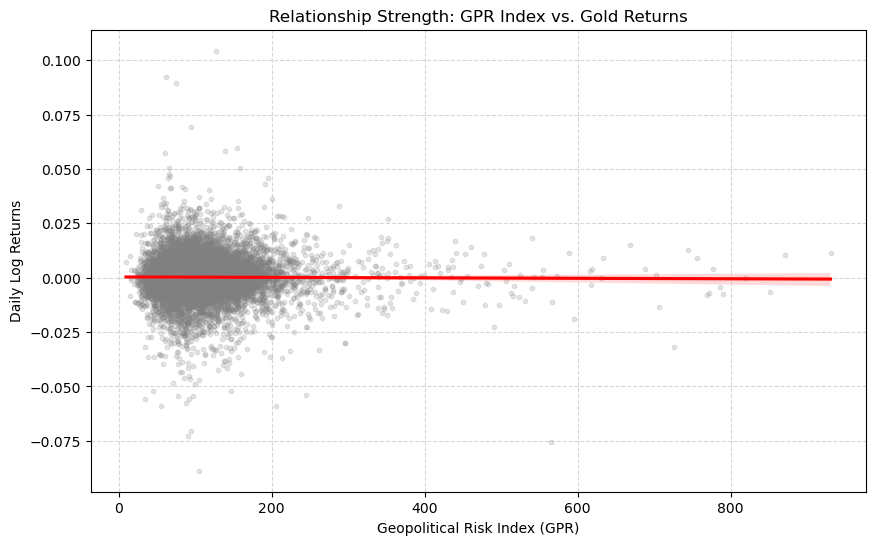

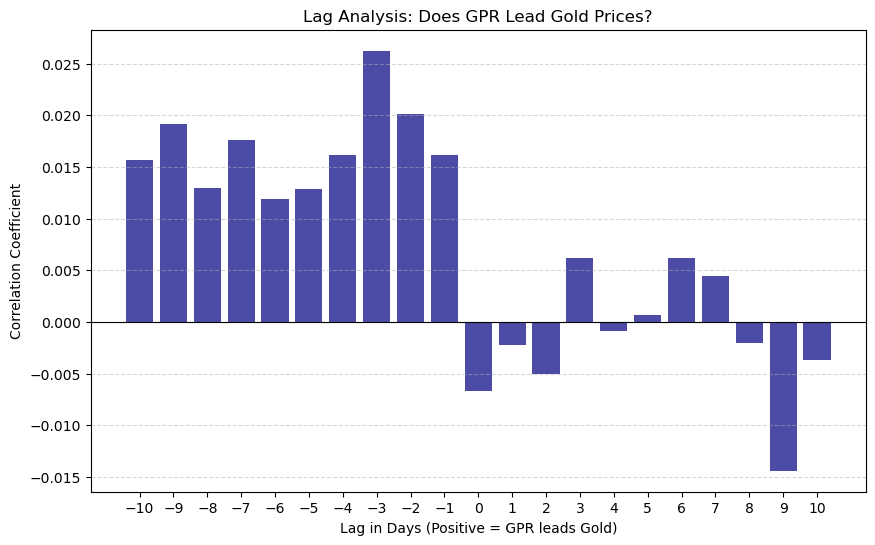

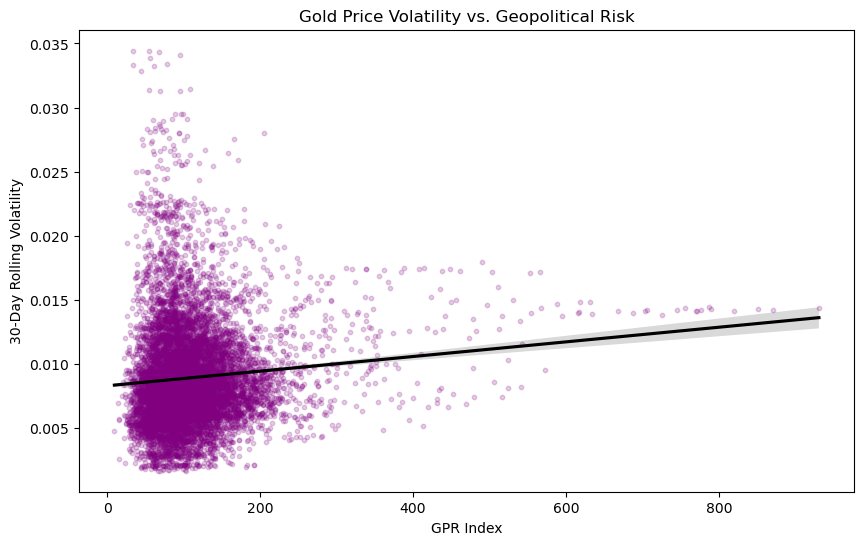

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



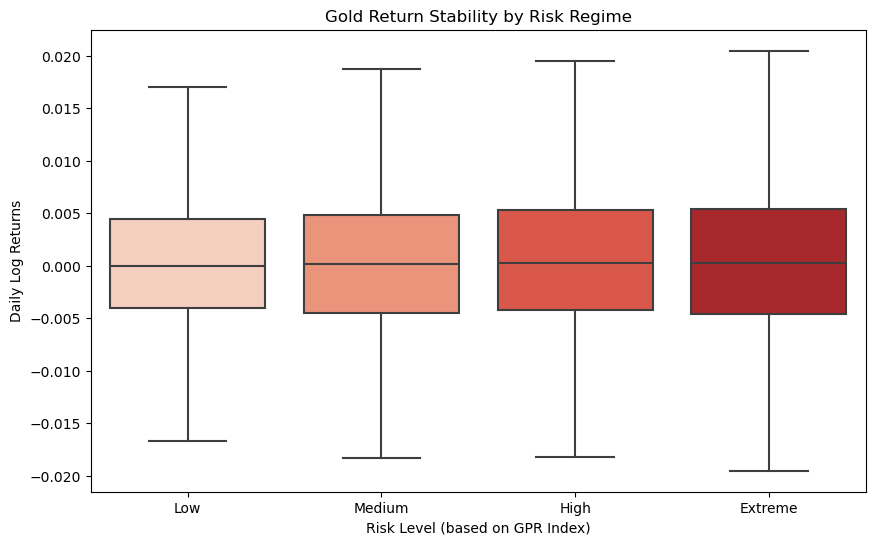

In [5]:
# --- 2. Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))
sns.regplot(x='gpr_index', y='log_price_change', data=df, 
            scatter_kws={'alpha':0.2, 's':10, 'color': 'gray'}, 
            line_kws={'color':'red', 'label': 'Linear Fit'})
plt.title('Relationship Strength: GPR Index vs. Gold Returns')
plt.xlabel('Geopolitical Risk Index (GPR)')
plt.ylabel('Daily Log Returns')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --- 3. Lag Analysis (Cross-Correlation) ---
lags = np.arange(-10, 11)
# Calculate correlation for each day shift
correlations = [df['log_price_change'].corr(df['gpr_index'].shift(l)) for l in lags]

plt.figure(figsize=(10, 6))
plt.bar(lags, correlations, color='navy', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Lag Analysis: Does GPR Lead Gold Prices?')
plt.xlabel('Lag in Days (Positive = GPR leads Gold)')
plt.ylabel('Correlation Coefficient')
plt.xticks(lags)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- 4. Volatility Scatter (Risk vs. Uncertainty) ---
# Calculate 30-day rolling standard deviation as a proxy for volatility
df['volatility_30d'] = df['log_price_change'].rolling(window=30).std()
df_vol = df.dropna(subset=['volatility_30d'])

plt.figure(figsize=(10, 6))
sns.regplot(x='gpr_index', y='volatility_30d', data=df_vol, 
            scatter_kws={'alpha':0.2, 's':10, 'color': 'purple'}, 
            line_kws={'color':'black'})
plt.title('Gold Price Volatility vs. Geopolitical Risk')
plt.xlabel('GPR Index')
plt.ylabel('30-Day Rolling Volatility')
plt.show()

# --- 5. Categorical Box Plot (Safe-Haven Proof) ---
# Divide GPR into 4 risk levels (Quartiles)
df['risk_regime'] = pd.qcut(df['gpr_index'], 4, labels=['Low', 'Medium', 'High', 'Extreme'])

plt.figure(figsize=(10, 6))
# 'showfliers=False' removes extreme outliers to make the "boxes" easier to compare
sns.boxplot(x='risk_regime', y='log_price_change', data=df, palette='Reds', showfliers=False)
plt.title('Gold Return Stability by Risk Regime')
plt.xlabel('Risk Level (based on GPR Index)')
plt.ylabel('Daily Log Returns')
plt.show()